In [1]:
#----------------------------------THIS IS THE UPDATED MAIN VERSION USED FOR FINAL WRITEUP RESULTS-------------------------------------------
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from PyPDF2 import PdfMerger
import csv
import lineid_plot
import matplotlib.patches as mpatches
# import pandas as pd

#smoothing function definition

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def map_DEG_to_RA(deg_list):
    RA_list=[]
    coord=0
    for i in range(0,len(deg_list)):
        hour= (deg_list[i]//1)*(1/15) #get the integer part of the float degree value and convert to hours. (1/15 hours per degree)
        minute= (hour-hour//1)*4.0 #decimal part of the degree float converted to minutes (4 minutes per degree)
        second= (minute-minute//1)*60 #decimal part of the minute coordinate, converted to seconds coordinate (60 sec per minute)
        coord=hour//1+(minute//1)/100+((second//1)//1)/10000
        RA_list.append(coord)
    return(RA_list)

def pickles_Plot(PName):
    with open('uvi_data.csv') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
    #         print(row)
            dat=fits.open(str(row[0]))
            if(str(row[0])==PName):

                #sort the names and spectral types using delimiter
                name=row[0][0:-5]
                SpecT=row[1]

                #Get the header info and curve data
                hdr = dat[0].header
                data=dat[1].data
                s1=[]

                wav=[]
                for i in range(540,1655):
                    s1.append(data[i][1])
                    wav.append(data[i][0])
#                     print(i,data[i][0])
#                 print(s1)

                s1max=max(s1)
                for i in range(0,len(s1)):
                    s1[i]=s1[i]/s1max


                plt.plot(wav, s1, label="Pickles "+str(SpecT), linewidth=0.9, color="teal")
        #         break
    f.close()
    


In [20]:
print(map_DEG_to_RA([22.2565,23]))

[1.0151000000000001, 1.0207]


0
ZZ_GDB1.fits


FileNotFoundError: [Errno 2] No such file or directory: './spectra_pdfs/GDB1.pdf'

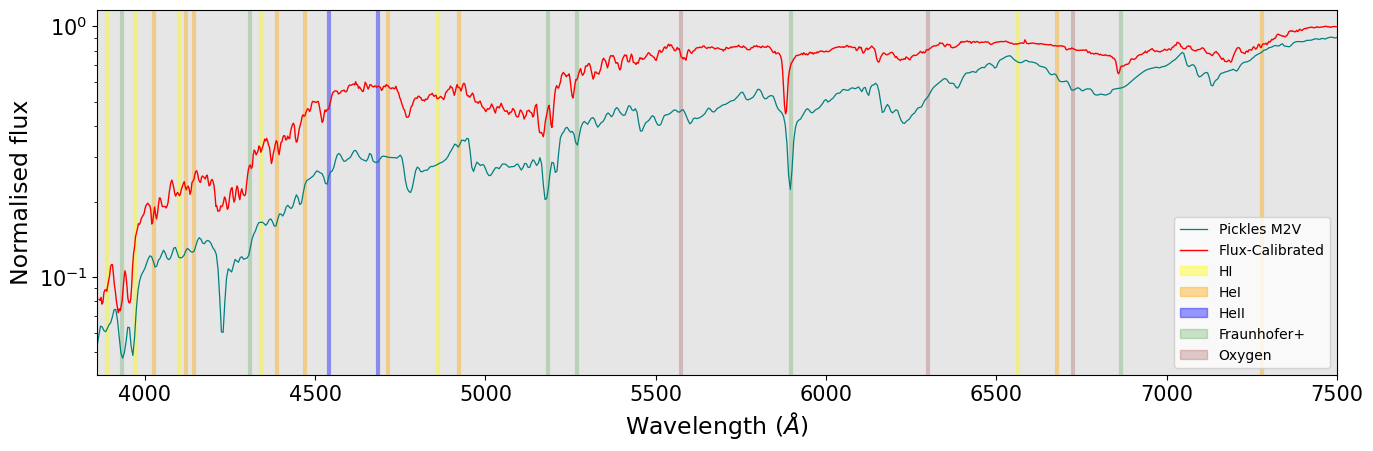

In [3]:


#Get the pdf merger ready for later
merger = PdfMerger()
Merge_files=[]

# Load data from CSV for the line locations to identify HI, HeI and HeII with
f_lines=open("Be_line_list(copy).txt", "r")

Be_name= []
Be_line= []
Be_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    Be_name.append(row_data[0])
    Be_line.append(float(row_data[1]))
    Be_color.append(row_data[2])
# print(Be_name,Be_line)
f_lines.close()

# Load data from CSV for the Fraunhofer lines
f_lines=open("Be_Fraunhofer_line_list.txt", "r")

FH_name= []
FH_line= []
FH_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    FH_name.append(row_data[0])
    FH_line.append(float(row_data[1]))
    FH_color.append(row_data[2])
# print(FH_name,FH_line)
f_lines.close()

f = open("all.csv", "r")
f_c = open("My_cal_files.csv", "r")
f_a = open("Arc_compare.csv", "r")

# Instantiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]
files_cali=[]
files_arc=[]

# Read first line for files and populate list
line=f.readline()
# print(f.readline())
while line!='':
    files.append(line[0:-1])
    line=f.readline()
#     print(line)
f.close()

# Read first line for files_cali and populate list
line=f_c.readline()
Smooth_Fac=[]
pickles_Match=[]
pickles_Type=[]
label_Y=[]
while line!='':
    row_data = line.strip("\n").split(',')
    
    files_cali.append(row_data[0])
    Smooth_Fac.append(row_data[1])
    pickles_Match.append(row_data[2])
    pickles_Type.append(row_data[3])
    label_Y.append(row_data[4])
    line=f_c.readline()
#     print(line)
f_c.close()

line=f_a.readline()
# print(f_a.readline())
while line!='':
    files_arc.append(line[0:-1])
    line=f_a.readline()
#     print(line)
f_a.close()

###########This is for the arc comparison with arcs that have been wavelength calibrated by 20231121/a5231077,
# comment out if not needed.##################

# plt.figure(figsize=(16, 9))
# plt.title("arc spectra comparison")
# plt.xlim(7600,7800)
# plt.xlabel("Wavelength (Angstroms)")
# plt.ylabel("Counts (unclalibrated)")
# plt.axvline(x = 7635.106, color = 'black', label = 'correct position of 7635 angstrom line', linewidth=0.8)
# plt.axvline(x = 7503.8691, color = 'black', label = 'correct position of 7503 angstrom line', linewidth=0.8)
# plt.axvline(x = 7724.2072, color = 'black', label = 'correct position of 7724 angstrom line', linewidth=0.8)
# for i in range(0,len(files_arc)): 
#     print(i)
#     col="blue"
#     labeln="21st late"
#     if i==0:
#         col="orange"
#         labeln="16th early"
#     if i==1:
#         col="red"
#         labeln="21st early"
#     #get the spectrum data from fits file from list of fits files
#     dat_arc=fits.open(str(files_arc[i]))
#     name=files_arc[i]
#     print(name)
    
#     hdr = dat_arc[0].header
# #     print(hdr)
#     data=dat_arc[0].data
#     s1=data[0,0]
    
    
#     # calculate the wavelength axis:
#     crval1 = hdr['CRVAL1']
# #     print(crval1)
#     cd11 = hdr['CD1_1']
# #     print(cd11)
#     wav = crval1 +np.arange(len(s1))*cd11
# #     print(max(wav))
    
#     plt.plot(wav, s1, label=labeln, linewidth=0.8, color=col)
    
#     plt.legend(loc='best')
    
# plt.show()

#################This is for the spectra to pdf generation ###################

for i in range(0,len(files)):
    print(i)
    #get the spectrum data from fits file from list of fits files
    dat=fits.open(str(files[i]))
    dat_cal=fits.open(str(files_cali[i]))
    name=files[i]
    print(name)
    
    hdr = dat[0].header
    hdr_cal=dat_cal[0].header
    
    data=dat[0].data
    data_cal=dat_cal[0].data
    
    s1=data[0,0][2:1301]
    n_s1=s1/max(s1)
    s1_cal=data_cal[0,0][2:1301]
    n_s1_cal=s1_cal/max(s1_cal)
    
    
    # calculate the wavelength axis:
    crval1 = hdr['CRVAL1']
#     print(crval1)
    cd11 = hdr['CD1_1']
#     print(cd11)
    wav = crval1 +np.arange(len(s1))*cd11
#     print(max(wav))
    
    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = crval1 +np.arange(len(s1_cal))*cd11

    
    
    
    
    fig=plt.figure(figsize=(16, 5)) #create the figure


    ax = fig.add_subplot(1, 1, 1) #this is for background color formating
    ax.set_facecolor((0.90, 0.90, 0.90))  
    
    plt.xlim(left=3860,right=7500) #Set x axis limits, max to 7500 if wish is to cut off section with no identifyable lines
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    #plot the lines for ID Hydrogen and Helium lines
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for j in range(0,len(Be_line)):

        plt.axvline(x = Be_line[j], color = Be_color[j], linewidth=3, alpha=0.4)
    
    #plot the lines for ID Fraunhofer lines

    for j in range(0,len(FH_line)):

        plt.axvline(x = FH_line[j], color = FH_color[j], linewidth=3, alpha=0.2)
        
    #Plot the pickles spectrum if matched to one:
    if(pickles_Match[i]!=''):
        Pickles_Plot=pickles_Plot(pickles_Match[i])
    
    #Plot the calibrated spectra
    plt.plot(wav_cal[4:1298], smooth(n_s1_cal[4:1298],int(Smooth_Fac[i])), label='Flux-Calibrated', linewidth=1, color='red')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.xlabel('Wavelength ($\AA$)', fontsize=17)
    plt.ylabel('Normalised flux', fontsize=17)
    

    HydrogenI_patch = mpatches.Patch(color='yellow',alpha=0.4, label='HI')
    HeliumI_patch = mpatches.Patch(color='orange',alpha=0.4, label='HeI')
    HeliumII_patch = mpatches.Patch(color='blue',alpha=0.4, label='HeII')
    Fraunhofer_patch = mpatches.Patch(color='green',alpha=0.2, label='Fraunhofer+')
    FeO_patch = mpatches.Patch(color='maroon',alpha=0.2, label='Oxygen')
    
    handles.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    labels.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    
#     print(handles)
#     print(labels)
    plt.legend(handles=handles,loc='best')
    plt.subplots_adjust(bottom=0.15) #Because the plt.savefig crops the bottom for some reason.

#     plt.legend(handles=[Hydrogen_patch, Helium_patch,Fraunhofer_patch],loc='best')
    plt.yscale("log") #set y scale to log to correctly display the spectra
#     plt.suptitle("Calibrated spectra for "+str(name[3:-5]), size=20, y=0.955)
    # plt.title("Calibrated spectrum for "+str(name[3:-5]), size=20)
#     plt.title("Calibrated spectra for "+str(name[3:-5]))
    
    Merge_files.append("./spectra_pdfs/"+str(name[3:-5])+'.pdf')
    
    plt.savefig(r"./spectra_pdfs/"+str(name[3:-5])+'.pdf', dpi=1600, orientation='landscape')
    plt.show()
    plt.close()
    
#     break


# now merge all pdfs into one pdf for conveniece
for pdf in Merge_files:
    merger.append(pdf)
merger.write("./spectra_pdfs/"+'All_Spectra.pdf')
merger.close()
print("merges happened")

#     plt.plot(wav,s1,'k-',alpha=0.5)
    
#     break

print()

In [ ]:
d=10**(0.2*(m-M+5)) #(distance in Parsec)

In [1]:
# %matplotlib widget
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.patches as mpatches
from PyPDF2 import PdfMerger
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum as fgc
from scipy.signal import find_peaks
from specutils.analysis import snr_derived
from specutils.analysis import gaussian_fwhm
from specutils.analysis import equivalent_width

from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

def Plot_Cont_Norm_Pic(PName):
    with open('uvi_data.csv') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
    #         print(row)
            dat=fits.open(str(row[0]))
            if(str(row[0])==PName):

                #sort the names and spectral types using delimiter
                name=row[0][0:-5]
                SpecT=row[1]

                #Get the header info and curve data
                hdr = dat[0].header
                data=dat[1].data
                s1=[]

                wav=[]
                for i in range(540,1655):#(540,1655)
                    s1.append(data[i][1])
                    wav.append(data[i][0])
    #                     print(i,data[i][0])
    #                 print(s1)

                #Continuum fitting 
                    #get objects in 'Quantity' format
                s1_cal=s1*u.Unit('erg cm-2 s-2 AA-1')
                print("s1_cal:",s1_cal)
                crval1 = s1_cal[0]
                cd11 = s1_cal[1]-s1_cal[0]
                wav_cal = wav*u.AA

                spec=Spectrum1D(spectral_axis=wav_cal,flux=s1_cal)
#                 print(spec)
                s_fit=fgc(spec,median_window=109)
                y_cont_fitted=s_fit(wav_cal)
                #Testing fitted continuum:
#                 print("cont_fitted",y_cont_fitted)
#                 fig=plt.figure(figsize=(16, 9)) #create the figure
#                 plt.yscale("log") #set y scale to log to correctly display the spectra
#                 plt.plot(spec.spectral_axis, spec.flux, label='spectra')
#                 plt.plot(wav_cal, y_cont_fitted, label='fitted continuum')
#                 plt.legend()
#                 plt.show()
#                 plt.close()

                #plotting
                s1max=max(s1)
                for i in range(0,len(s1)):
                    s1[i]=s1_cal[i]/y_cont_fitted[i]

#                 plt.yscale("log")
#                 plt.xlim(3968.6,7500)
                plt.plot(wav, s1, label="Pickles "+str(SpecT), linewidth=0.5, color="teal")
        #         break
    f.close()

def Plot_Cont_Norm_MrKT(PName):
    f_c = open("My_cal_files.csv", "r")
    files_cali=[]
    line=f_c.readline()
    while line!='':
        row_data = line.strip("\n").split(',') # split the csv data columns
        files_cali.append(row_data[0]) #add the name of the file into the file names list
        line=f_c.readline() #read the next line
    #     print(line)
    f_c.close()

    dat_cal=fits.open(PName)
    name=PName
    print(name)

    hdr_cal=dat_cal[0].header
    data_cal=dat_cal[0].data

    s1_cal=data_cal[0,0]*u.Unit('erg cm-2 s-2 AA-1') #flux data
    n_s1_cal=s1_cal/max(s1_cal) #normalised flux

    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = (crval1 +np.arange(len(s1_cal))*cd11)*u.AA #wavelength data


    spec=Spectrum1D(spectral_axis=wav_cal,flux=s1_cal)
    print(spec)
    s_fit=fgc(spec,median_window=109)
    y_cont_fitted=s_fit(wav_cal)
    s1=[]

    for i in range(0,len(spec.flux)):
        s1.append(s1_cal[i]/y_cont_fitted[i])


#     fig=plt.figure(figsize=(16, 9)) #create the figure
#     plt.yscale("log")
#     plo=77
#     plt.ylim(min(s1[plo:1000])-0.3*min(s1[plo:1000]),max(s1[plo:1000])+0.3*max(s1[plo:1000]))
    plt.plot(wav_cal, s1, label="Target", linewidth=0.7, color="red")
    plt.legend()



In [55]:

# Plot_Cont_Norm_MrKT("Cal_ZZ_GDB6.fits")
# Plot_Cont_Norm_Pic("pickles_4.fits")


0
Cal_ZZ_GDB1.fits
Spectrum1D (length=1981)
Flux=[1.7092532e-14 1.6930412e-14 1.7387296e-14 ... 1.4256483e-13
      1.0521653e-13 1.0638017e-13] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3854.69140625 3857.50152802 3860.3116498  ... 9413.11227655
               9415.92239833 9418.7325201 ] Angstrom,  mean=6636.71196 Angstrom


s1_cal: [5.3566218e-10 4.8377680e-10 4.5443016e-10 ... 8.3306881e-09 8.1770919e-09
 8.0422193e-09] erg / (Angstrom cm2 s2)


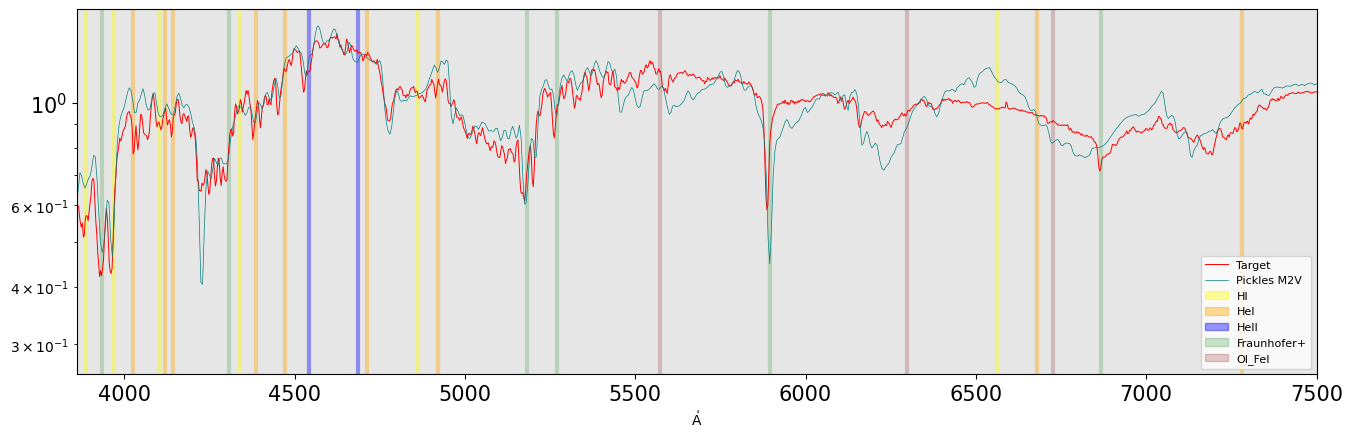

1
Cal_ZZ_GDB2.fits
Spectrum1D (length=1981)
Flux=[5.3603629e-15 5.3444590e-15 5.3709660e-15 ... 4.8916969e-14
      4.9699828e-14 5.0482655e-14] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3856.07482052 3858.89085197 3861.70688343 ... 9426.18504047
               9429.00107193 9431.81710339] Angstrom,  mean=6643.94596 Angstrom
s1_cal: [4.5314083e-10 4.3340598e-10 4.1334866e-10 ... 3.3828520e-09 3.2970853e-09
 3.2301379e-09] erg / (Angstrom cm2 s2)


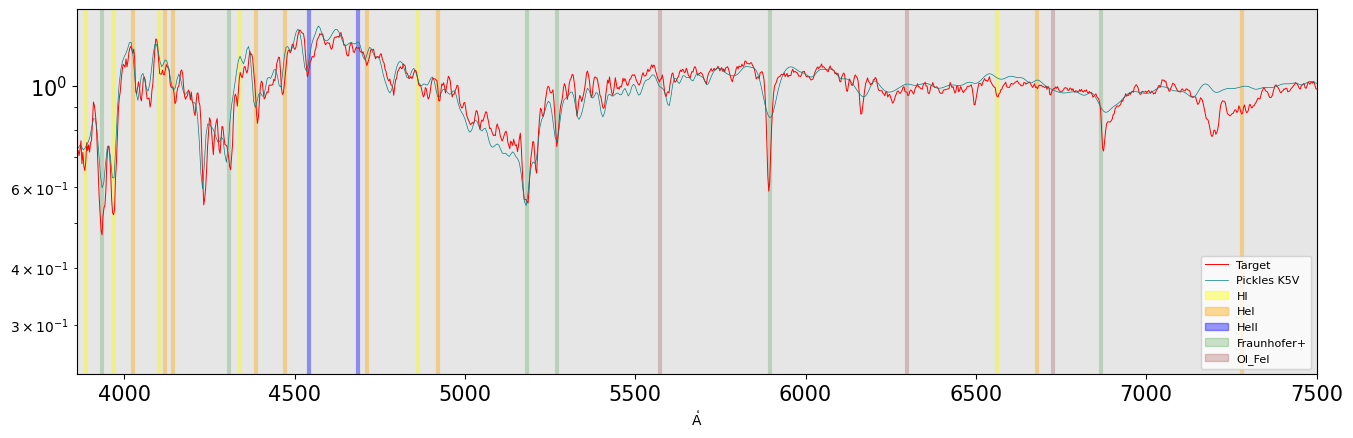

2
Cal_ZZ_GDB3.fits
Spectrum1D (length=1981)
Flux=[2.9079827e-16 2.2278867e-16 2.6129177e-16 ... 1.2263782e-15
      1.1980346e-15 1.2263303e-15] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3855.60218668 3858.4167757  3861.23136473 ... 9422.85927534
               9425.67386436 9428.48845339] Angstrom,  mean=6642.04532 Angstrom


s1_cal: [7.0195189e-10 5.9517358e-10 5.6147498e-10 ... 3.0004399e-09 2.9048759e-09
 2.8130869e-09] erg / (Angstrom cm2 s2)


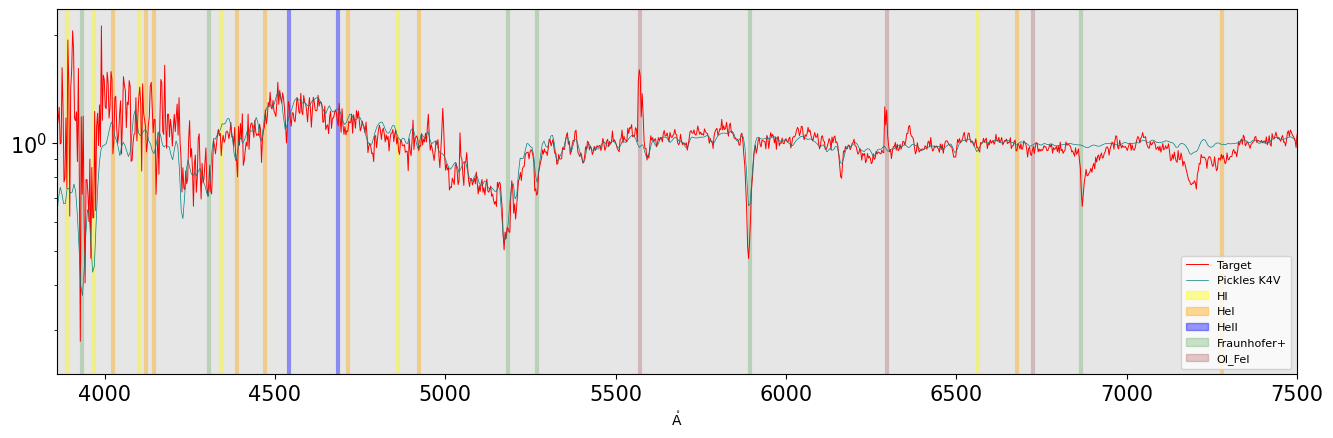

3
Cal_ZZ_GDB4.fits
Spectrum1D (length=1981)
Flux=[3.2298074e-15 3.4037934e-15 3.3313757e-15 ... 6.3717201e-16
      6.2226211e-16 6.5841311e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3857.50152802 3860.3116498  3863.12177157 ... 9415.92239833
               9418.7325201  9421.54264188] Angstrom,  mean=6639.52208 Angstrom
s1_cal: [6.3352861e-09 6.8609789e-09 7.1147088e-09 ... 8.0574702e-10 7.8567886e-10
 7.7038853e-10] erg / (Angstrom cm2 s2)


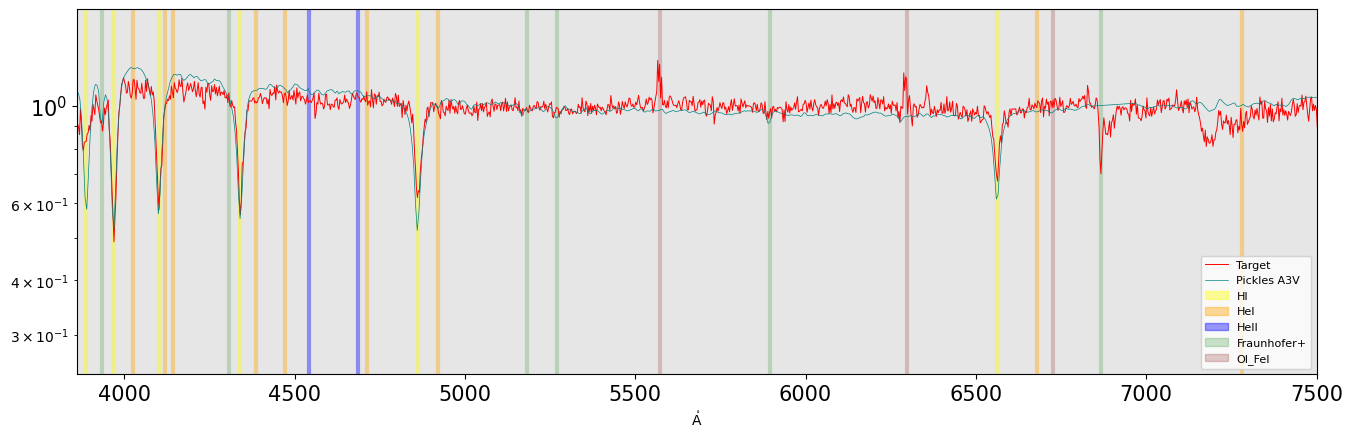

4
Cal_ZZ_GDB5.fits
Spectrum1D (length=1981)
Flux=[3.2598245e-15 3.6582146e-15 3.6239877e-15 ... 5.9631107e-15
      5.9225912e-15 5.8551572e-15] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3849.60471797 3852.42403555 3855.24335313 ... 9426.21488976
               9429.03420734 9431.85352492] Angstrom,  mean=6640.72912 Angstrom
s1_cal: [5.2351518e-10 5.1350302e-10 5.0576737e-10 ... 2.7490223e-09 2.6135312e-09
 2.5397353e-09] erg / (Angstrom cm2 s2)


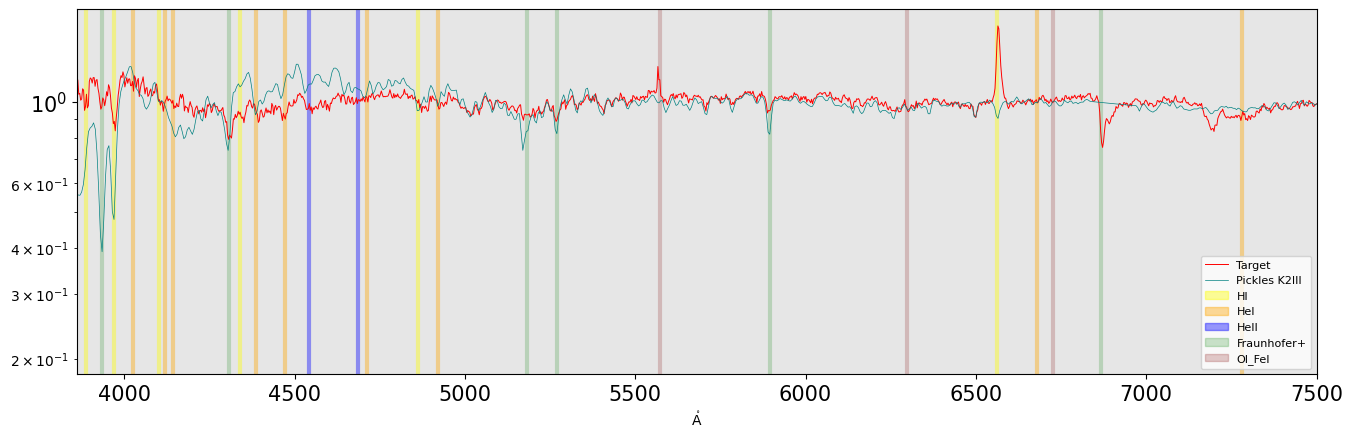

5
Cal_ZZ_GDB6.fits
Spectrum1D (length=1981)
Flux=[2.4135232e-15 3.1523646e-15 3.0516147e-15 ... 4.6010824e-16
      3.6699849e-16 3.8640404e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3855.8992455  3858.71743631 3861.53562713 ... 9430.28067374
               9433.09886456 9435.91705537] Angstrom,  mean=6645.90815 Angstrom


s1_cal: [1.2881474e-08 1.3109511e-08 1.2989170e-08 ... 5.8442395e-10 5.7672056e-10
 5.5965016e-10] erg / (Angstrom cm2 s2)


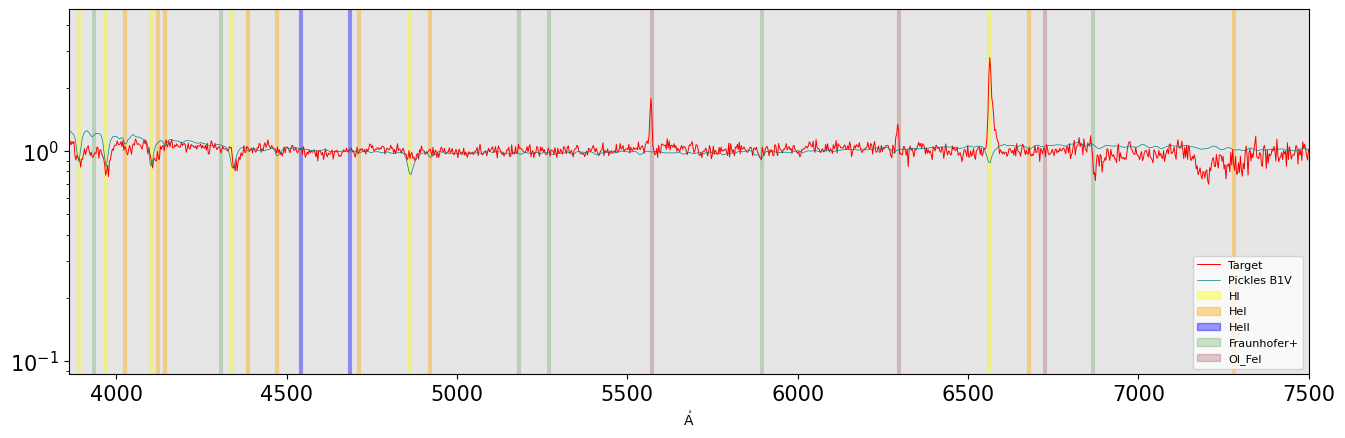

6
Cal_ZZ_GDB7.fits
Spectrum1D (length=1981)
Flux=[5.9846452e-15 5.9233526e-15 5.9858268e-15 ... 6.0169065e-16
      6.2256620e-16 5.6511492e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3845.87430573 3848.69538879 3851.51647186 ... 9425.97661591
               9428.79769897 9431.61878204] Angstrom,  mean=6638.74654 Angstrom


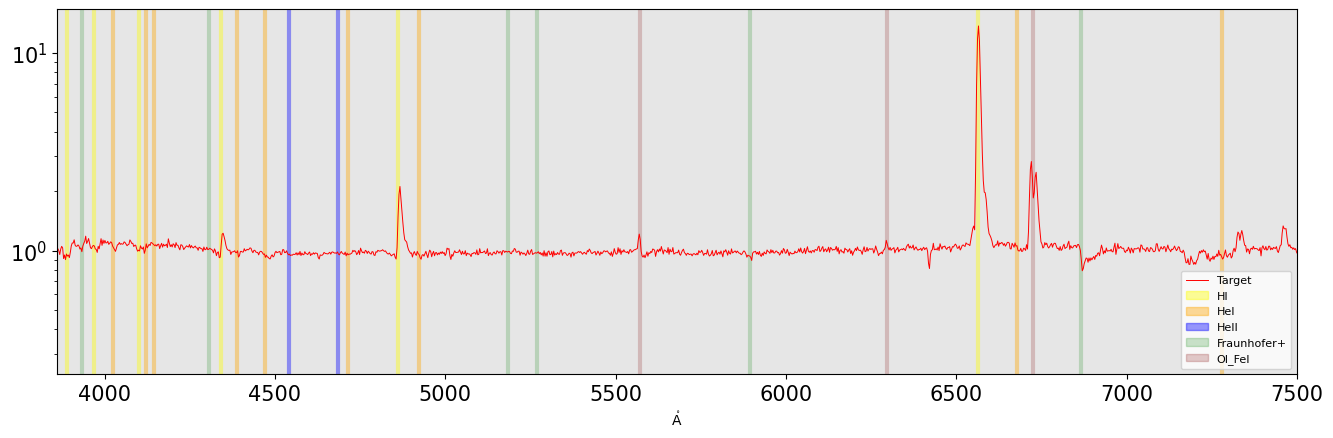

7
Cal_ZZ_GDB8.fits
Spectrum1D (length=1981)
Flux=[7.0329760e-15 6.9932781e-15 7.1497704e-15 ... 5.9332244e-16
      5.4825319e-16 5.7527571e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3853.85526228 3856.67097378 3859.48668528 ... 9423.33260584
               9426.14831734 9428.96402884] Angstrom,  mean=6641.40965 Angstrom


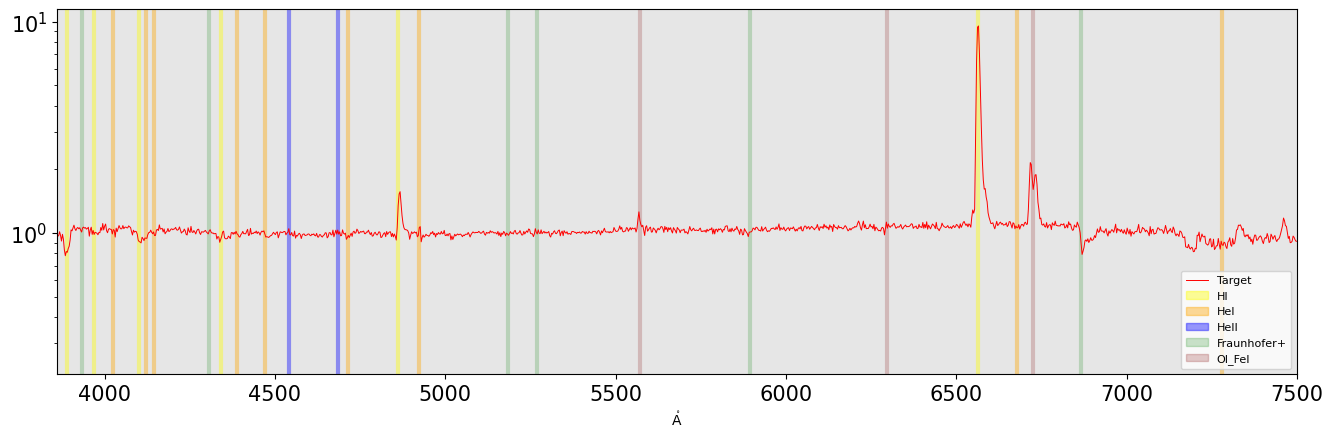

8
Cal_ZZ_GDB9.fits
Spectrum1D (length=1981)
Flux=[4.4025092e-15 4.7120862e-15 5.0384819e-15 ... 2.0586434e-16
      1.5298983e-16 3.3822298e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3852.48501515 3855.301085   3858.11715484 ... 9422.67116141
               9425.48723125 9428.3033011 ] Angstrom,  mean=6640.39416 Angstrom


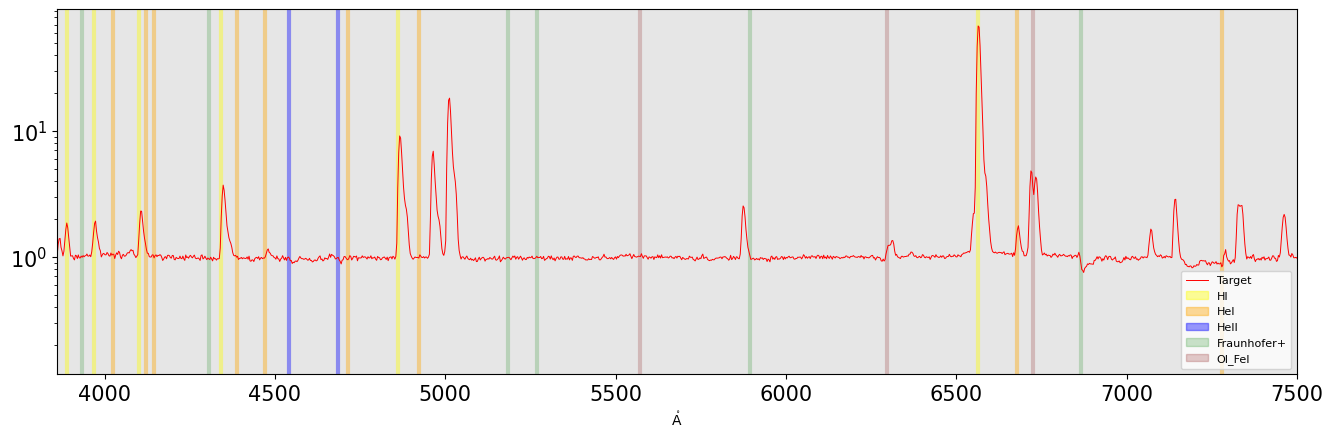

9
Cal_ZZ_GDB10.fits
Spectrum1D (length=1981)
Flux=[5.7454232e-15 5.8135289e-15 5.7231780e-15 ... 5.3524806e-16
      4.9586113e-16 5.2827497e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3851.56091118 3854.37621689 3857.1915226  ... 9420.23560524
               9423.05091095 9425.86621666] Angstrom,  mean=6638.71356 Angstrom
s1_cal: [9.7689776e-09 1.0022476e-08 1.0038783e-08 ... 7.0767442e-10 6.9005740e-10
 6.6558847e-10] erg / (Angstrom cm2 s2)


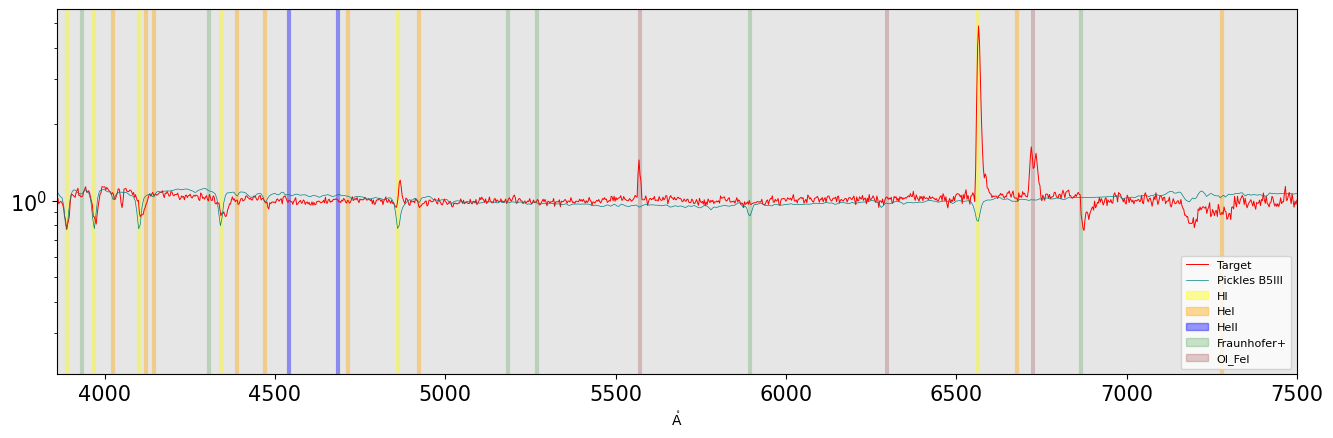

10
Cal_ZZ_GDB13.fits
Spectrum1D (length=1981)
Flux=[2.3832623e-15 2.4979408e-15 2.6948946e-15 ... 1.2464304e-16
      1.2360003e-16 1.2151401e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3852.6626308  3855.48029089 3858.29795098 ... 9425.99429536
               9428.81195545 9431.62961555] Angstrom,  mean=6642.14612 Angstrom


s1_cal: [8.7266541e-09 8.7796437e-09 8.7532532e-09 ... 8.8333074e-10 8.8051538e-10
 8.7164242e-10] erg / (Angstrom cm2 s2)


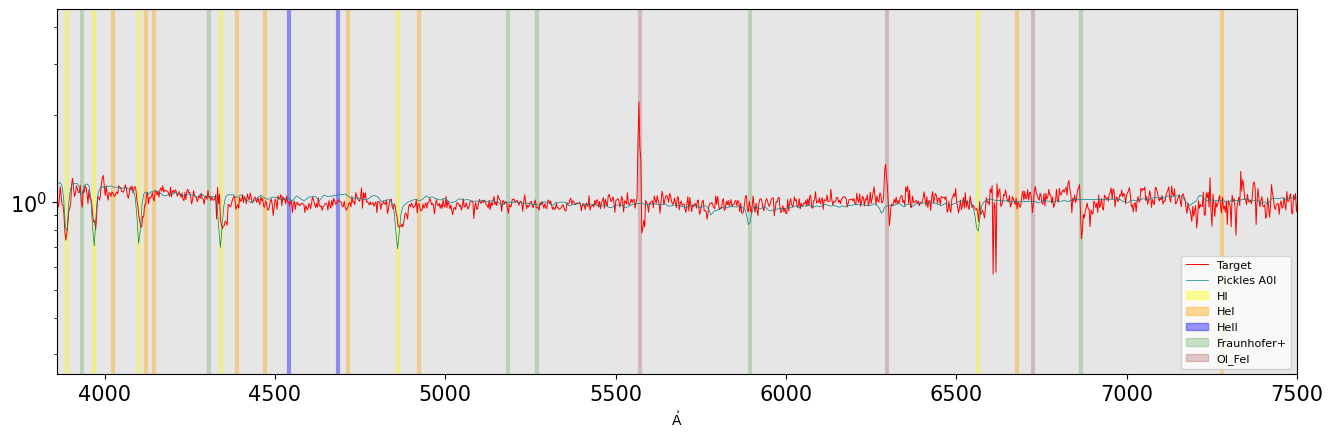

11
Cal_ZZ_GDB14.fits
Spectrum1D (length=1981)
Flux=[ 7.6986549e-16  7.8362528e-16  7.9136869e-16 ... -1.5893847e-17
      -5.4669074e-18  2.3455436e-17] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3841.3252027  3844.15138197 3846.97756124 ... 9431.5077908
               9434.33397007 9437.16014934] Angstrom,  mean=6639.24268 Angstrom


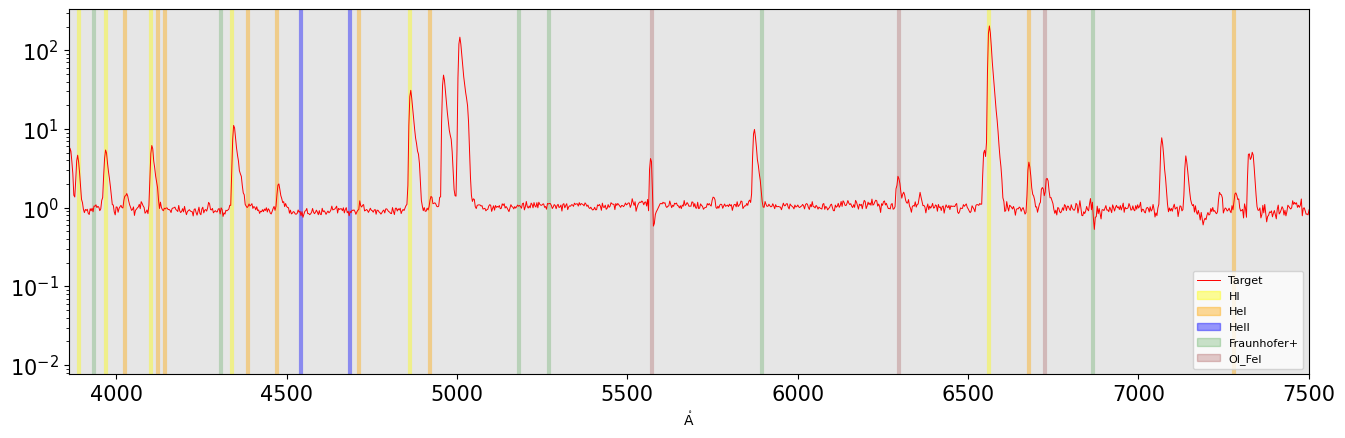

12
Cal_ZZ_GDB21.fits
Spectrum1D (length=1981)
Flux=[9.8629363e-16 9.0629264e-16 8.7657735e-16 ... 2.0179702e-16
      2.0901892e-16 2.2635656e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3848.40265942 3851.21913719 3854.03561497 ... 9419.3956995
               9422.21217728 9425.02865505] Angstrom,  mean=6636.71566 Angstrom
s1_cal: [1.0612915e-08 1.0621923e-08 1.0580438e-08 ... 6.2490108e-10 6.0224209e-10
 5.8621269e-10] erg / (Angstrom cm2 s2)


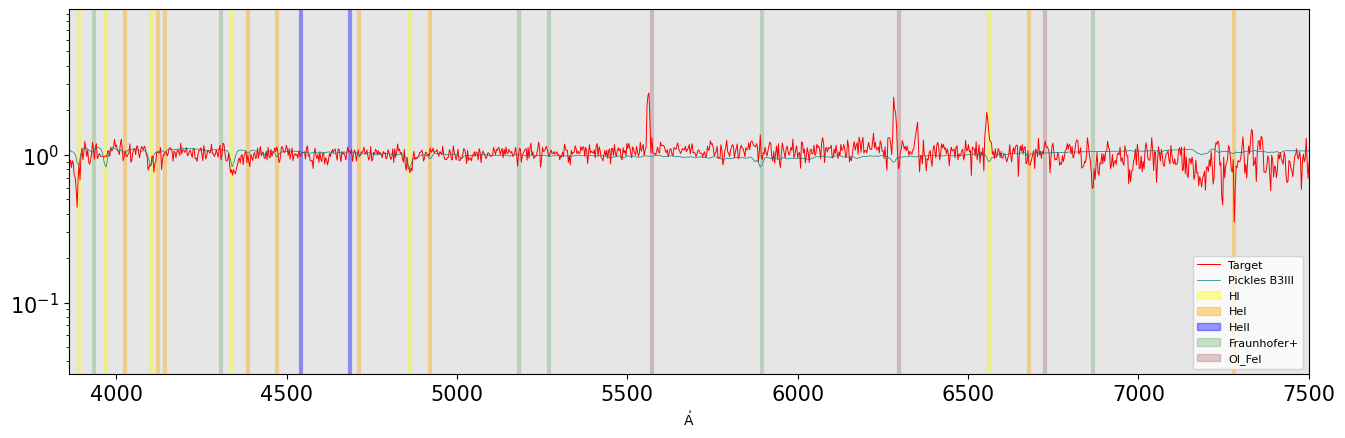

13
Cal_ZZ_GDB23.fits
Spectrum1D (length=1981)
Flux=[7.7235392e-16 9.2216011e-16 8.5044405e-16 ... 5.7216864e-17
      7.7886473e-17 7.0165569e-17] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3847.05451822 3849.87270832 3852.69089842 ... 9421.43453169
               9424.25272179 9427.07091188] Angstrom,  mean=6637.06272 Angstrom
s1_cal: [1.0132342e-08 1.0520693e-08 1.0738688e-08 ... 6.8860923e-10 6.7613642e-10
 6.6542249e-10] erg / (Angstrom cm2 s2)


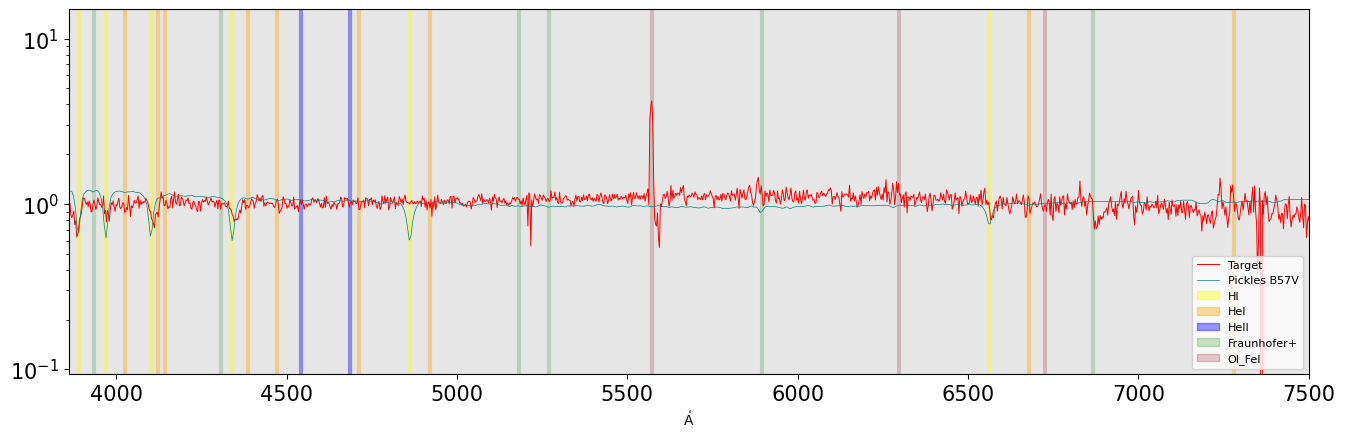

14
Cal_ZZ_GDB25.fits
Spectrum1D (length=1981)
Flux=[1.4385342e-16 1.6260486e-16 1.9269416e-16 ... 2.3139908e-16
      2.3347251e-16 2.3243579e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3841.99587536 3844.81767845 3847.63948154 ... 9423.52239323
               9426.34419632 9429.16599941] Angstrom,  mean=6635.58094 Angstrom


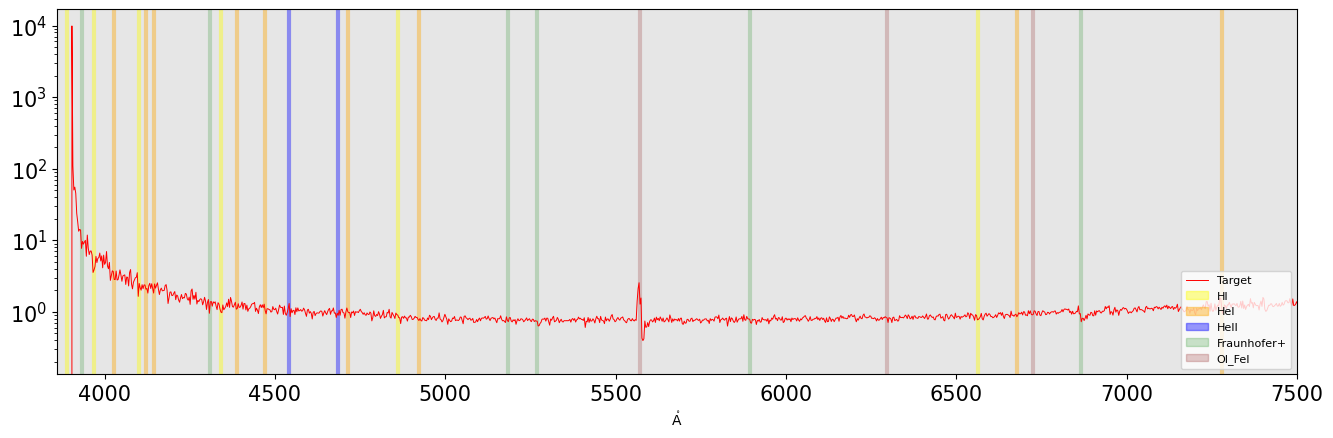

15
Cal_ZZ_GDB27.fits
Spectrum1D (length=1981)
Flux=[3.2382027e-16 3.3368281e-16 3.5979802e-16 ... 1.0496587e-16
      1.0496372e-16 1.0182950e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3844.63404465 3847.45461273 3850.27518082 ... 9423.71771622
               9426.5382843  9429.35885239] Angstrom,  mean=6636.99645 Angstrom
s1_cal: [4.5661213e-09 4.7966240e-09 4.9462230e-09 ... 1.2614000e-09 1.2605444e-09
 1.2285766e-09] erg / (Angstrom cm2 s2)


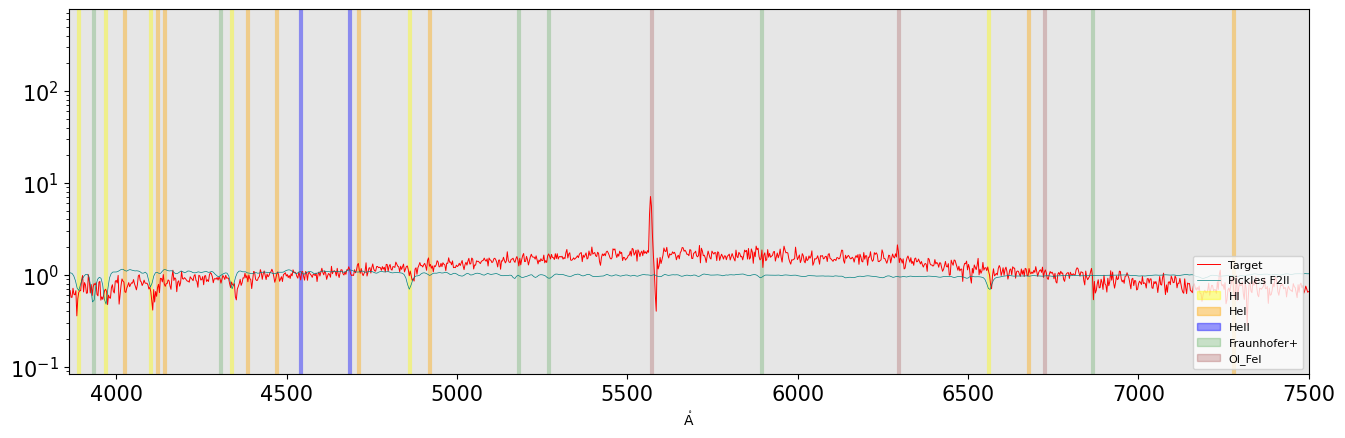

16
Cal_ZZ_GDB30.fits
Spectrum1D (length=1981)
Flux=[9.7541106e-16 9.8943104e-16 9.8096760e-16 ... 1.3054646e-16
      1.2565096e-16 1.2564851e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3841.65435338 3844.47716379 3847.2999742  ... 9425.17334723
               9427.99615765 9430.81896806] Angstrom,  mean=6636.23666 Angstrom


s1_cal: [6.7925257e-09 7.2395094e-09 7.5022815e-09 ... 8.9034613e-10 8.8850832e-10
 8.6279106e-10] erg / (Angstrom cm2 s2)


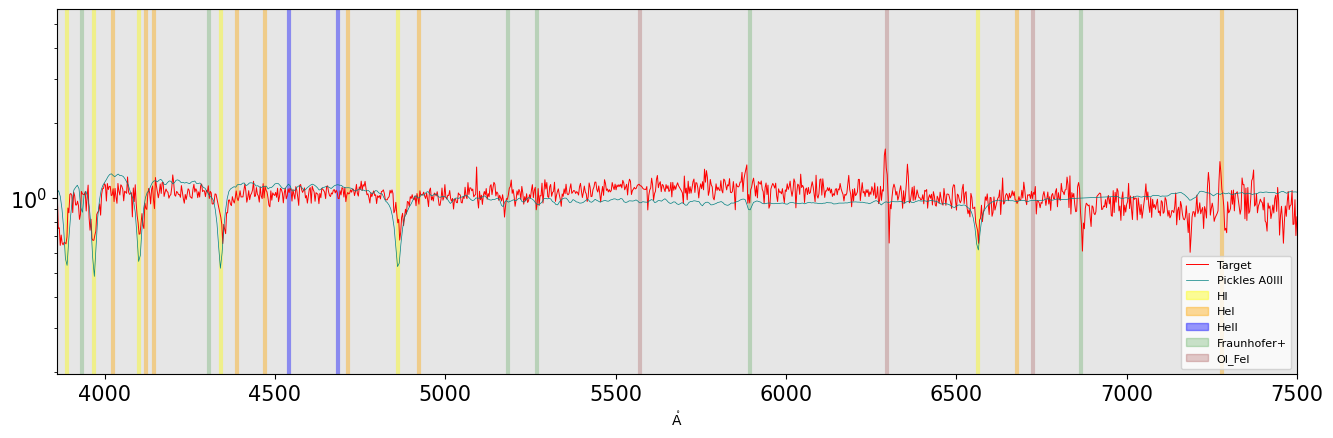

17
Cal_ZZ_GDB32.fits
Spectrum1D (length=1981)
Flux=[8.0806308e-17 9.0446721e-17 7.5349292e-17 ... 2.7434301e-16
      1.8462773e-16 1.8925883e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3841.6668911  3844.48978806 3847.31268501 ... 9425.35707283
               9428.17996979 9431.00286675] Angstrom,  mean=6636.33488 Angstrom
s1_cal: [4.7177673e-10 4.6773646e-10 4.6010298e-10 ... 2.4247804e-09 2.3661788e-09
 2.3242912e-09] erg / (Angstrom cm2 s2)


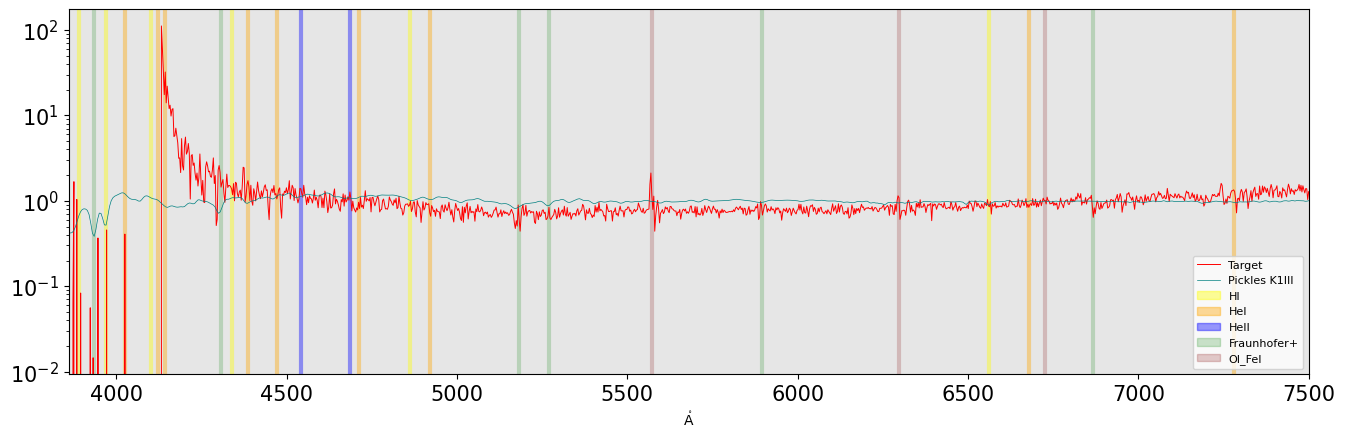

18
Cal_ZZ_GDB34.fits
Spectrum1D (length=1981)
Flux=[4.2407684e-16 3.5455465e-16 5.8311871e-16 ... 9.2991426e-17
      9.2989659e-17 9.2987899e-17] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3841.65719724 3844.47699213 3847.29678702 ... 9419.21149611
               9422.03129101 9424.8510859 ] Angstrom,  mean=6633.25414 Angstrom
s1_cal: [9.038777e-09 8.923977e-09 8.770770e-09 ... 8.427277e-10 8.235217e-10
 7.991252e-10] erg / (Angstrom cm2 s2)


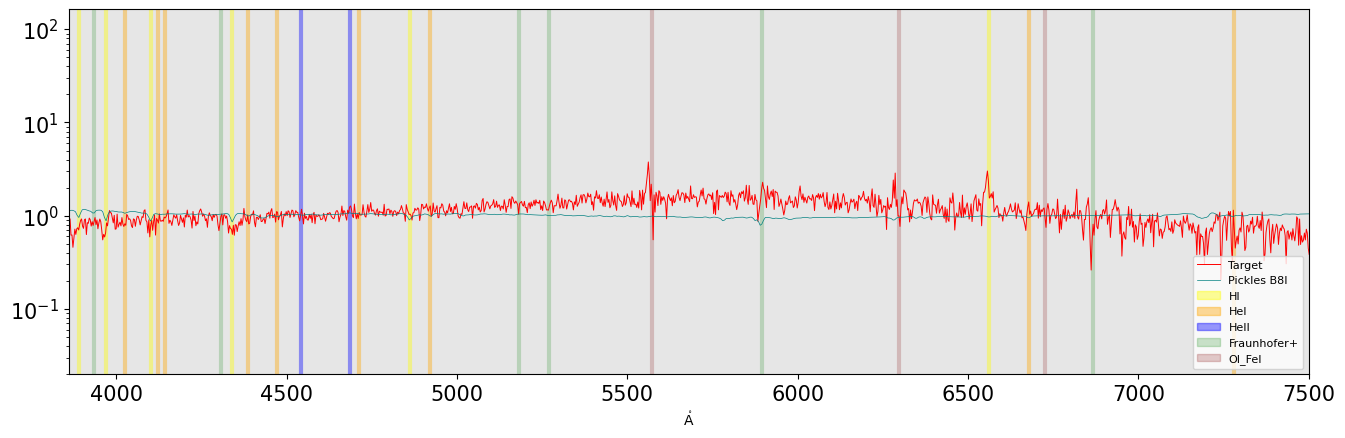

19
Cal_ZZ_GDB37.fits
Spectrum1D (length=1981)
Flux=[1.0768228e-16 1.5436469e-16 2.0790679e-16 ... 9.7909551e-17
      9.6141270e-17 9.4078275e-17] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3851.2355957  3854.0565927  3856.8775897  ... 9431.16766119
               9433.98865819 9436.80965519] Angstrom,  mean=6644.02263 Angstrom


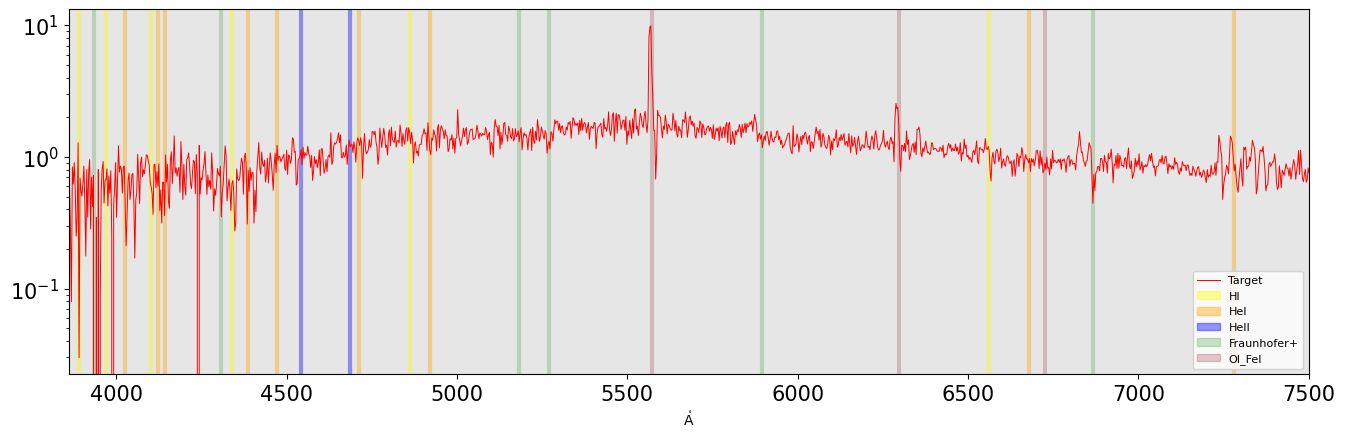

20
Cal_ZZ_GDB38.fits
Spectrum1D (length=1981)
Flux=[ 3.5378719e-16  3.0775282e-16  3.5920169e-16 ... -3.0734853e-18
      -1.1913720e-17  2.1290140e-17] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3836.29570341 3839.12509823 3841.95449305 ... 9432.83865213
               9435.66804695 9438.49744177] Angstrom,  mean=6637.39657 Angstrom


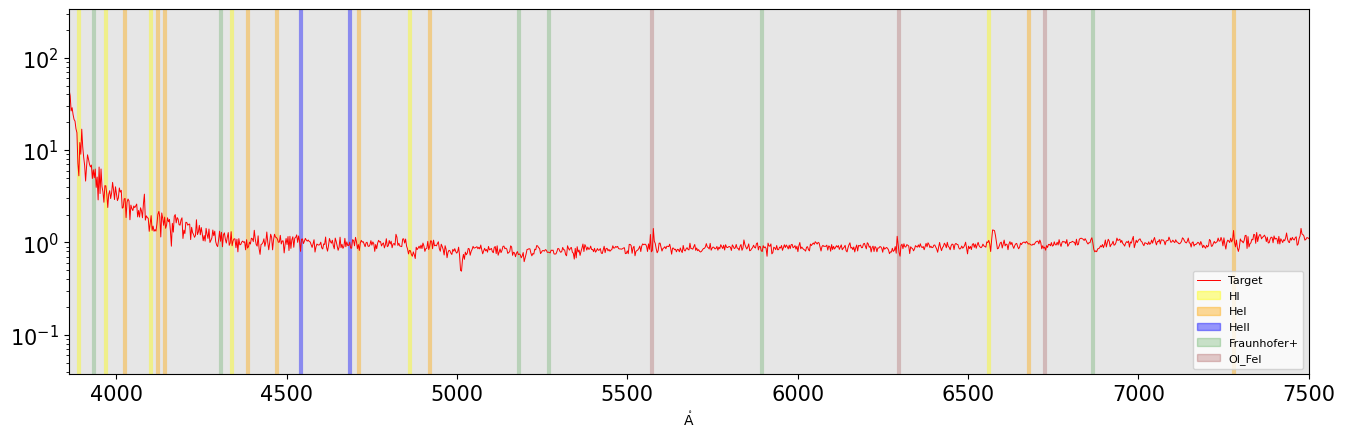

21
Cal_ZZ_GDB40.fits
Spectrum1D (length=1981)
Flux=[2.1492983e-16 1.9689191e-16 2.1351747e-16 ... 8.5061669e-17
      7.9492150e-17 7.5314768e-17] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3836.64506674 3839.47128582 3842.2975049  ... 9426.90641069
               9429.73262978 9432.55884886] Angstrom,  mean=6634.60196 Angstrom


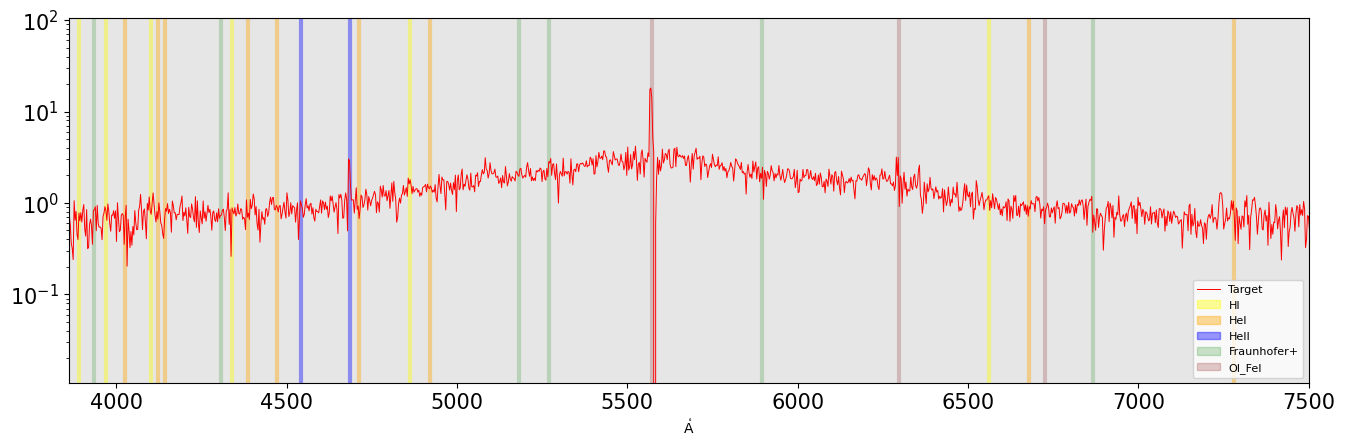

22
Cal_ZZ_GDB41.fits
Spectrum1D (length=1981)
Flux=[6.0859238e-16 7.1272513e-16 6.2129745e-16 ... 3.7358277e-16
      3.6869221e-16 3.5525615e-16] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3829.71459317 3832.5461297  3835.37766623 ... 9430.49385238
               9433.32538891 9436.15692544] Angstrom,  mean=6632.93576 Angstrom
s1_cal: [3.0079350e-09 3.0290874e-09 3.0268179e-09 ... 1.5723689e-09 1.5428010e-09
 1.5282180e-09] erg / (Angstrom cm2 s2)


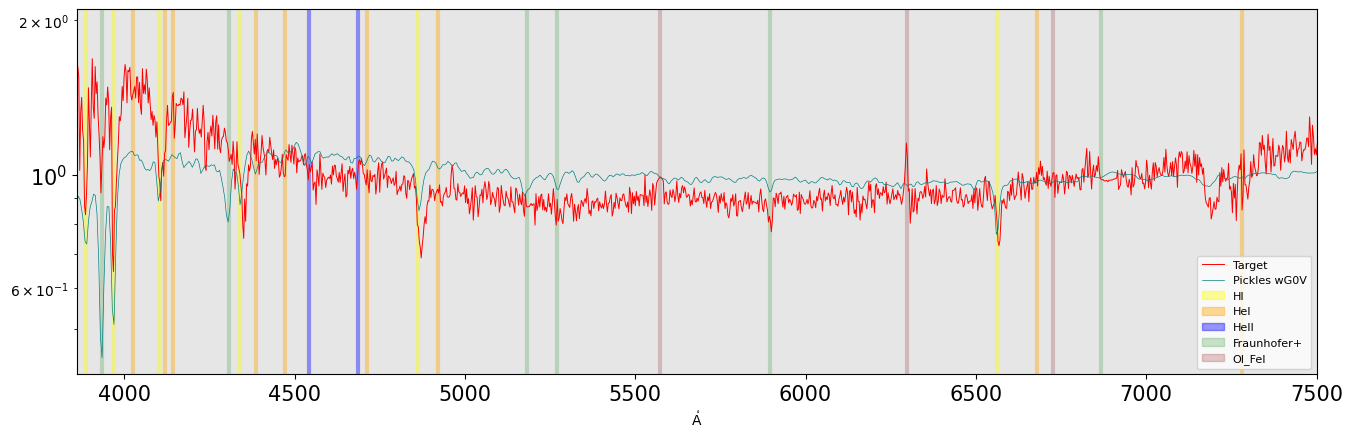

23
Cal_ZZ_LTT1020_21112023.fits
Spectrum1D (length=1981)
Flux=[7.8390053e-14 7.9705672e-14 7.8023478e-14 ... 3.0000857e-14
      2.9737443e-14 3.1054515e-14] erg / (Angstrom cm2 s2),  mean=0.00000 erg / (Angstrom cm2 s2)
Spectral Axis=[3854.69140625 3857.50152802 3860.3116498  ... 9413.11227655
               9415.92239833 9418.7325201 ] Angstrom,  mean=6636.71196 Angstrom
s1_cal: [2.2050519e-09 2.1211588e-09 2.0420077e-09 ... 1.7459250e-09 1.7308933e-09
 1.7262403e-09] erg / (Angstrom cm2 s2)


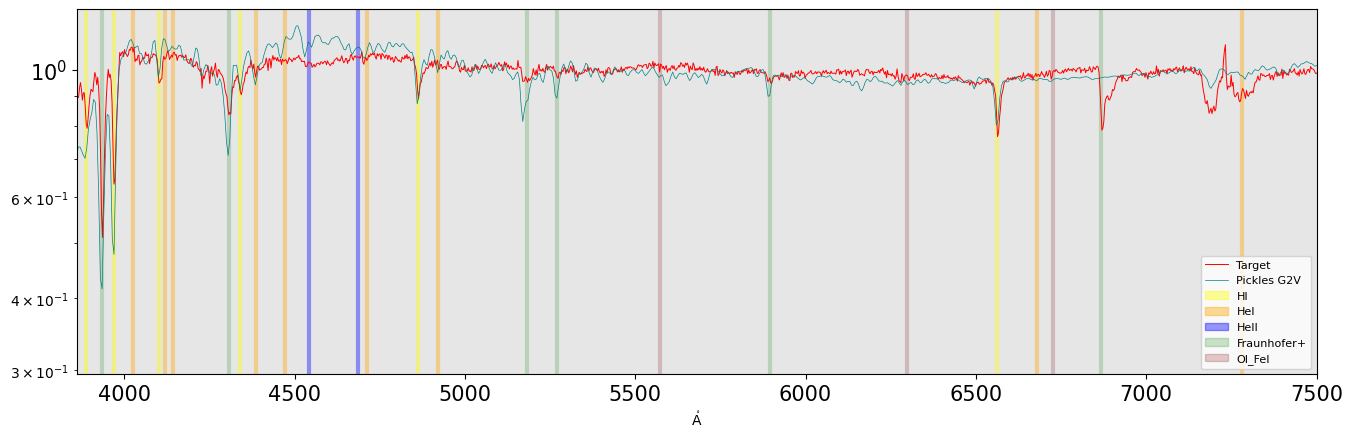

merges happened



In [2]:

#Get the pdf merger ready for later
merger = PdfMerger()
Merge_files=[]

# Load data from CSV for the line locations to identify HI, HeI and HeII with
f_lines=open("Be_line_list(copy).txt", "r")

Be_name= []
Be_line= []
Be_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    Be_name.append(row_data[0])
    Be_line.append(float(row_data[1]))
    Be_color.append(row_data[2])
f_lines.close()

# Load data from CSV for the Fraunhofer lines
f_lines=open("Be_Fraunhofer_line_list.txt", "r")

FH_name= []
FH_line= []
FH_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    FH_name.append(row_data[0])
    FH_line.append(float(row_data[1]))
    FH_color.append(row_data[2])
f_lines.close()

f = open("all.csv", "r")
f_c = open("My_cal_files.csv", "r")

# Instansiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]
files_cali=[]

# Read first line for files and populate list
line=f.readline()
while line!='':
    files.append(line[0:-1])
    line=f.readline()
f.close()

# Read first line for files_cali and populate list
line=f_c.readline()
Smooth_Fac=[]
pickles_Match=[]
pickles_Type=[]
label_Y=[]
while line!='':
    row_data = line.strip("\n").split(',')
    
    files_cali.append(row_data[0])
    Smooth_Fac.append(row_data[1])
    pickles_Match.append(row_data[2])
    pickles_Type.append(row_data[3])
    label_Y.append(row_data[4])
    line=f_c.readline()
f_c.close()

for i in range(0,len(files)):
    print(i)
    #get the spectrum data from fits file from list of fits files
    name=files_cali[i]
    
    fig=plt.figure(figsize=(16, 5)) #create the figure

    ax = fig.add_subplot(1, 1, 1) #this is for background color formating
    ax.set_facecolor((0.90, 0.90, 0.90))
    
    plt.xlim(left=3860,right=7500) #Set x axis limits, max to 7500 if wish is to cut off section with no identifyable lines due to high noise
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    
    #plot the lines for ID Hydrogen and Helium lines
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for j in range(0,len(Be_line)):

        plt.axvline(x = Be_line[j], color = Be_color[j], linewidth=3, alpha=0.4)

    #plot the lines for ID Fraunhofer lines

    for j in range(0,len(FH_line)):

        plt.axvline(x = FH_line[j], color = FH_color[j], linewidth=3, alpha=0.2)

    #Plot the calibrated spectra
    My_Plot=Plot_Cont_Norm_MrKT(name)
    
    #Plot the pickles spectrum if matched to one:
    if(pickles_Match[i]!=''):
        Pickles_Plot=Plot_Cont_Norm_Pic(pickles_Match[i])
    
    handles, labels = plt.gca().get_legend_handles_labels()
    # plt.xlabel('Wavelength ($\AA$)', fontsize=17)
    # plt.ylabel('Normalised flux', fontsize=17)
    

    HydrogenI_patch = mpatches.Patch(color='yellow',alpha=0.4, label='HI')
    HeliumI_patch = mpatches.Patch(color='orange',alpha=0.4, label='HeI')
    HeliumII_patch = mpatches.Patch(color='blue',alpha=0.4, label='HeII')
    Fraunhofer_patch = mpatches.Patch(color='green',alpha=0.2, label='Fraunhofer+')
    FeO_patch = mpatches.Patch(color='maroon',alpha=0.2, label='OI_FeI')
    
    handles.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    labels.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])

    plt.legend(handles=handles,loc='lower right', fontsize=8)
    plt.subplots_adjust(bottom=0.15) #Because the plt.savefig crops the bottom for some reason.
    
    
    plt.yscale("log") #set y scale to log to correctly display the spectra

    # plt.title("Calibrated spectrum for "+str(name[7:-5]), size=20)
    plt.autoscale(axis='y')
    
    Merge_files.append("./spectra_pdfs_TEST/"+str(name[7:-5])+'.pdf')
    
    plt.savefig(r"./spectra_pdfs_TEST/"+str(name[7:-5])+'.pdf', dpi=3000, orientation='landscape')
    plt.show()
    plt.close()
    
#     break

# now merge all pdfs into one pdf for conveniece
for pdf in Merge_files:
    merger.append(pdf)
merger.write("./spectra_pdfs_TEST/"+'All_Spectra.pdf')
merger.close()
print("merges happened")
   
print()